In [2]:
import cv2
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import argparse
from imutils.video import VideoStream
from imutils.video import FPS
import imutils
from sklearn.svm import LinearSVC
from skimage import feature
import skimage
import zipfile

In [2]:
cv2.__version__

'4.6.0'

In [3]:
os.chdir("F:\Machine learing\myProject\data")

In [2]:
event = [i for i in dir(cv2) if 'EVENT' in i]

In [5]:
event

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

# Read Video

In [ ]:
cap = cv2.VideoCapture(
    "background video _ people _ walking _ ( 720 X 1280 ).mp4")
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

print(cap.isOpened())
while(cap.isOpened()):
   ret, frame = cap.read()
   if ret == True:
      # print(cap.get(cv2.CAP_PROP_FRAME_w))
      # print(cap.get(cv2.CAP_PROP_FRAME_h))

      out.write(frame)
      gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
      cv2.imshow('frame', gray)
      if cv2.waitKey(22) == ord("q"):
         break
   else:
      break

cap.release()
out.release()


# handle mouse events 

In [21]:
def click_events(event, x, y, flag, param):
   if event == cv2.EVENT_LBUTTONDOWN:
      font = cv2.FONT_HERSHEY_COMPLEX
      strXY = str(x) + ',' + str(y)
      cv2.putText(img, strXY, (x, y), font, 0.5, (255, 255, 0), 2)
      cv2.imshow('img', img)
   # if event == cv2.EVENT_RBUTTONDOWN:
   #    blue = img[x, y, 0]
   #    green = img[x, y, 1]
   #    red = img[x, y, 2]
   #    strBGR = str(blue) + ','+str(green) + ','+str(red)
   #    font = cv2.FONT_HERSHEY_COMPLEX
   #    cv2.putText(img, strBGR, (x, y), font, 0.5, (0, 255, 255), 2)
   #    cv2.imshow('img', img)


img = cv2.imread("lana2.jpg")
# img = cv2.resize(img,(500,500))
cv2.imshow('img', img)
cv2.setMouseCallback('img', click_events)

cv2.waitKey()
cv2.destroyAllWindows()


# Object detecions by using template

(-0.5, 299.5, 299.5, -0.5)

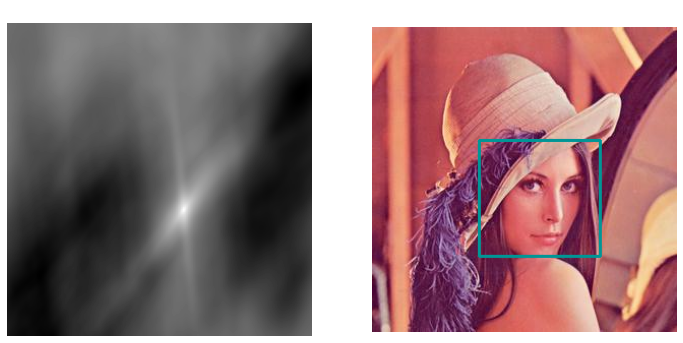

In [51]:
img = cv2.imread("lana2.jpg", 1)
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
template = cv2.imread("tenplate.png", 0)
w , h = template.shape[::-1]
res = cv2.matchTemplate(imgGray, template, cv2.TM_CCORR_NORMED)
min_val , max_val ,min_loc,max_loc = cv2.minMaxLoc(res)

top_left =max_loc
bottom_rihgt = (top_left[0] + w , top_left[1] + h)
cv2.rectangle(img , top_left,bottom_rihgt,(150,150,0),2)
# cv2.imshow("template", template)
# cv2.imshow("image", img)
# cv2.waitKey()
# cv2.destroyAllWindows()
# print(top_left)
# bottom_rihgt
plt.figure(figsize=(12,17))
plt.subplot(121)
plt.imshow(res,cmap="gray")
plt.title("Matching Result",c='#FFF')
plt.axis("off")
plt.subplot(122)
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB), cmap="gray")
plt.title("Detected Point" ,c = '#FFF')
plt.axis("off")


# Convex hull

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


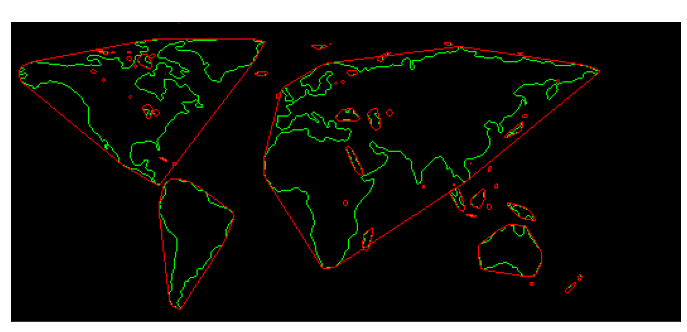

In [33]:
# read image
img = cv2.imread("world.jpg")
# convert to gray scale
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# apply cv2.blur to smoothe the image 
blur = cv2.blur(imgGray, (3, 3))
# apply threshold
ret ,threshlod = cv2.threshold(blur,220,255,cv2.THRESH_BINARY_INV)

# find contoures
contours , hierarchy = cv2.findContours(threshlod,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# find convex Hull 
convexhull = []
for contour in contours:
   convexhull.append(cv2.convexHull(contour,False))

# create an empty black image
drawing = np.zeros((threshlod.shape[0],threshlod.shape[1],3))
# iterating througth the rectangles to draw bounding_box
for i in range(len(contours)):
   # draw contour 
   cv2.drawContours(drawing,contours,i,(0,255,0),1,8,hierarchy)

   # draw convex
   cv2.drawContours(drawing,convexhull,i,(255,0,0),1,8,hierarchy)

# plot the image 
plt.figure(figsize=(12,17))
plt.imshow(drawing)
plt.yticks([])
plt.xticks([])
plt.title("Contour & ConvexHull" , c = "#FFF")
plt.show()

# #2 Example

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


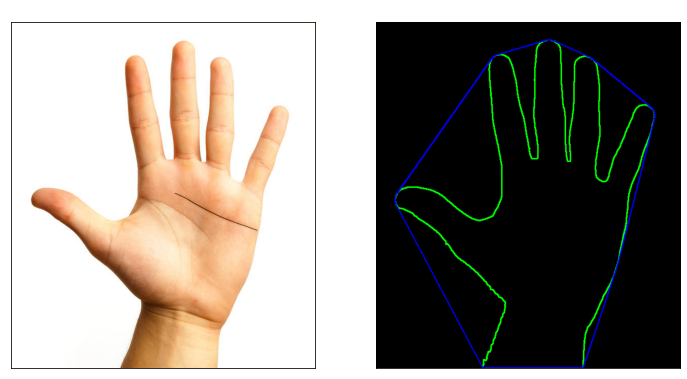

In [67]:
# read an image
img = cv2.imread("HandLines1.jpg")

# converte to gray scale  image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# make smoothe
blur = cv2.GaussianBlur(gray_img, (5, 5), 0)

# apply threshold
secces, threshlod = cv2.threshold(blur, 250, 255, cv2.THRESH_BINARY_INV)

# Fine the contours
contours, hierarchy = cv2.findContours(threshlod, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# fine convex hull by using cv2.convexHull method
convexhull = []
for contour in contours:
   convexhull.append(cv2.convexHull(contour, False))

# create an empty black image
drawing = np.zeros((threshlod.shape[0], threshlod.shape[1], 3))
# draw a contours
cv2.drawContours(drawing, contours, -1, (0, 255, 0), 2, 8, hierarchy)

# draw convex hull
cv2.drawContours(drawing, convexhull, -1, (0, 0, 255), 2, 8, hierarchy)

# show
# cv2.imshow("Contours & convex_Hull", drawing)
# cv2.imshow("gray_img", threshlod)
# cv2.waitKey()
# cv2.destroyAllWindows()

# plot the image
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.yticks([])
plt.xticks([])
plt.title("Input", c="#FFF")

plt.subplot(122)
plt.imshow(drawing)
plt.yticks([])
plt.xticks([])
plt.title("Contour & ConvexHull", c="#FFF")
plt.show()
plt.show()


# Motion detection 

In [103]:
# read the video
cap = cv2.VideoCapture("background video _ people _ walking _ ( 720 X 1280 ).mp4")

ret,frame1 = cap.read()
ret,frame2 = cap.read()
FOURCC = cv2.VideoWriter_fourcc('X','V','I','D')
out = cv2.VideoWriter("output.mp4",FOURCC,45.0,(1200,720))

w = cap.get(cv2.CAP_PROP_FRAME_w)
h = cap.get(cv2.CAP_PROP_FRAME_h)

while cap.isOpened():
   # ret, frame = cap.read()
   difr = cv2.absdiff(frame1 ,frame2)
   gray = cv2.cvtColor(difr,cv2.COLOR_BGR2GRAY)
   blur = cv2.GaussianBlur(gray, (5, 5), 0)
   _, threshlod = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)
   dilate = cv2.dilate(threshlod,None,iterations=15)
   contours , hierarchy = cv2.findContours(dilate,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
   for contour in contours:
      contour = cv2.approxPolyDP(contour ,0.01 * cv2.arcLength(contour,True),True)
      (x, y, w, h) = cv2.boundingRect(contour)
      if cv2.contourArea(contour) < 2000:
         continue
      cv2.rectangle(frame1,(x,y),(x+w, y+h) , (0,255,0),3)

   frame1 = cv2.resize(frame1,(1280,720))
   cv2.imshow("Frame",frame1)
   # cv2.imshow("dilate", dilate)
   # cv2.imshow("thres", threshlod)


   frame1 = frame2
   _ , frame2 = cap.read()
   if cv2.waitKey(22) == ord("q"):
      break

cap.release()
cv2.destroyAllWindows()


# Face detection using cascade classifier 

In [13]:
# load the image
img = cv2.imread("player.jpg")

# convert the input iamge into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# load required harr cascade xml classifier file
harr_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# applying the face cascade method
face_rect = harr_cascade.detectMultiScale(gray, 1.1, 9)

# iterating thruoth the rectangle of detected face
for (x, y, w, h) in face_rect:
   cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# show the detecte
cv2.imshow("detected faces", img)

cv2.waitKey()
cv2.destroyAllWindows()


# Harris corner detector

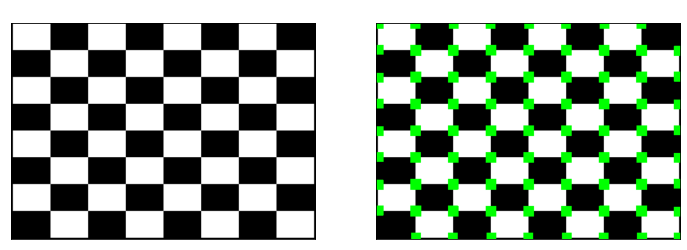

In [69]:
# load the image
img = cv2.imread("chess.png")
# resize the image
img = cv2.resize(img, (720, 512))
# copy
img2 = img.copy()

# convert to gray scale
gray_img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# modify the data type ==> set to 32-bite floating points
dest = np.float32(gray_img)

# apply cv2.cornerHarris method to detecte corners
dest = cv2.cornerHarris(dest, blockSize=2, ksize=5, k=0.07)

# apply dilation to dilated corners
dest = cv2.dilate(dest, None, iterations=11)

# Reverting back to the original image with optimal threshlod values
img2[dest > 0.1 * dest.max()] = (0, 255, 0)

# show image
# cv2.imshow("Corners Detected", img)
# cv2.waitKey()
# cv2.destroyAllWindows()

# plot the image
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.yticks([])
plt.xticks([])
plt.title("Input", c="#FFF")

plt.subplot(122)
plt.imshow(img2)
plt.yticks([])
plt.xticks([])
plt.title("Contour & ConvexHull", c="#FFF")
plt.show()
plt.show()

# Histogtam Oriented Gradient

In [86]:
filename = "Pedestrain_2.jpg"


# dine some hyperprametr 
winStride = (2, 2)
padding = (10,10)
scale = 1.02
def HOGDescriptor():

   # load an image
   img = cv2.imread(filename=filename)
   
   # resize the image 
   img = cv2.resize(img , (720,512))
   # convert BGR image to Gray scale image
   gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

   # Create HOGDescriptor
   hog = cv2.HOGDescriptor()

   # Initialize HOGDescriptor
   hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

   # detecte people
   bounding_boxes, weights = hog.detectMultiScale(gray,winStride=winStride,padding= padding,scale=scale)
   i = 1
   for (x, y, w, h) in bounding_boxes:
      cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
      
   cv2.imshow("HOG Detected",img)
   print(len(weights))
   cv2.waitKey()
   cv2.destroyAllWindows()

HOGDescriptor()

7


# Predicting over the Video

In [4]:
# Create HOGDescriptor 
hog = cv2.HOGDescriptor()
# make initializing the HOGDescriptor
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# read a Video
cap = cv2.VideoCapture("input/video1.mp4")
width = int(cap.get(3))
height = int(cap.get(4))

# keep minimum frame size for accurate prediections
if width < 400:
   width = 400
   ratio = width / float(width)
   height = (width * ratio)

while cap.isOpened():

   # read a frame
   success , frame = cap.read()

   if success:
      # Start time
      start_time = time.time()
      # resize the frame
      frame = cv2.resize(frame, (width , height))

      # Convert BGR input frame to gray scale
      frame_gray = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)

      # Detecte people
      bounding_boxes , weights = hog.detectMultiScale(frame_gray,padding = (7,7),winStride = (2,2),scale = 1.02)

      # iterating thruoth the bounding_boxes of detected object
      for i, (x, y, w, h ) in enumerate(bounding_boxes):
         if weights[i] < 0.32:
            continue
         elif weights[i] < 0.40 and weights[i] > 0.32:
            cv2.rectangle(frame,(x, y),(x+w, y+h),(0,0,255),2)
         elif weights[i] < 0.6 and weights[i] > 0.4:
            cv2.rectangle(frame , (x, y),(x+w, y+h),(50, 122, 255),2)
         elif weights[i] > 0.6:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
      # putext
      cv2.putText(frame, 'High confidence', (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
      cv2.putText(frame, 'Moderate confidence', (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (50, 122, 255), 2)
      cv2.putText(frame, 'Low confidence', (10, 55), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

      # meature the elapsed time for detections
      end_time = time.time()
      elapsed_time = 1/(end_time - start_time)

      # what about wait time
      wait_time = max(1,int(elapsed_time/4))
      # show result
      cv2.imshow("HOG Detected",frame)
      # press 'q' to exit
      if cv2.waitKey(22) == ord("q"):
         break
   else:
      break

cv2.waitKey()
cap.release()
cv2.destroyAllWindows()

In [ ]:
# construct the argument parser and parser the arguments
# parser = argparse.ArgumentParser()
# parser.add_argument('--p', '--path', help='what folder to use for HOG description',choices=['flowers', 'person_car_cup'])
# args = vars(parser.parse_args())
train_path = "HOG/input/"
test_path = "HOG/test_images/"
images = []
labels = []
# get all the image folder paths
image_paths = os.listdir(path=train_path)
for path in image_paths:
	# get all the image names
   all_images = os.listdir(image_paths + '/' + path)

   # iterate over the image names, get the label
   for image in all_images:
      image_path = os.path.join(all_images,image)
      image = cv2.imread(image_path)
      image = cv2.resize(image, (128, 256))

      # get the HOG descriptor for the image
      hog_desc = feature.hog(image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')

      # update the data and labels
      images.append(hog_desc)
      labels.append(path)


# train Linear SVC
print('Training on train images...')
svm_model = LinearSVC(random_state=42, tol=1e-5)
svm_model.fit(images, labels)

# predict on the test images
print('Evaluating on test images...')
# loop over the test dataset
filename = os.listdir(test_path)
for (i, imagePath) in enumerate(os.path.join(test_path, filename)):

	image = cv2.imread(f"test_images/{args['path']}/{imagePath}")
	resized_image = cv2.resize(image, (128, 256))

	# get the HOG descriptor for the test image
	(hog_desc, hog_image) = feature.hog(resized_image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys', visualize=True)
	# prediction
	pred = svm_model.predict(hog_desc.reshape(1, -1))[0]

	# convert the HOG image to appropriate data type. We do...
	# ... this instead of rescaling the pixels from 0. to 255.
	hog_image = hog_image.astype('float64')
	# show thw HOG image
	cv2.imshow('HOG Image', hog_image)

	# put the predicted text on the test image
	cv2.putText(image, pred.title(), (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.0,(0, 255, 0), 2)
	cv2.imshow('Test Image', image)
	# multiply by 255. to bring to OpenCV pixel range
	# cv2.imwrite(f"outputs/{args['path']}_hog_{i}.jpg", hog_image*255.)
	# cv2.imwrite(f"outputs/{args['path']}_pred_{i}.jpg", image)
	cv2.waitKey(0)
   
cv2.destroyAllWindows()


# Track Single Object using OpenCV

In [21]:
Tracker = cv2.TrackerMIL_create()
initBB = None
cap = cv2.VideoCapture("vtest.avi")
success , frame = cap.read()
frame = imutils.resize(frame , width=500)


In [22]:
while True:
   if initBB is not None:
      success,frame = cap.read()
      if not success:
         break
      frame = imutils.resize(frame,width=500)
      (success,box) = Tracker.update(frame)
      if success:
         (x, y, w, h) = [int(j) for j in box]
         cv2.rectangle(frame, (x,y),(x+w, y+h), (0,255,0),2)
      cv2.imshow("frame1",frame)
      key = cv2.waitKey(30)
      if key == ord("q"):
         break
   else:
      initBB = cv2.selectROI('frame', frame)
      Tracker.init(frame, initBB)

cv2.destroyAllWindows()

In [44]:
img = cv2.imread("HOG/input/person_car_cup/cup/black-coffee-2847957_640.jpg")
img = cv2.resize(img, (512, 320))
img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
cany = imutils.auto_canny(img)
(hog, hog_img) = feature.hog(cany, orientations=9, pixels_per_cell=(8, 8),
                             cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True, transform_sqrt=True)
# dilat = cv2.dilate(hog_img,None)
cv2.imshow("HOG", hog_img)
cv2.waitKey()
cv2.destroyAllWindows()

(1023, 791, 3)

In [8]:

gray = cv2.imread("car_logos.jpg",0)

edged = imutils.auto_canny(gray)

cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# extract the logo of the car and resize it to a canonical w
# and h
(x, y, w, h) = cv2.boundingRect(c)
logo = gray[y:y + h, x:x + w]
logo = cv2.resize(logo, (200, 100))
logo = gray[y:y + h, x:x + w]
logo = cv2.resize(logo, (200, 100))

# extract Histogram of Oriented Gradients from the logo
H = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
cv2.imshow("edges", H)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
def imagepyrmid(image , scale = 1.5,minScale = (224,224)):
   # yield original image 
   yield image
   # keep looping over the image 
   while True :
      # compute the dimontional of next image
      w = int(image.shape[1]/scale)
      image = imutils.resize(image=image , width=w) 

      if image.shape[0] < minScale[1] or image.shape[1] < minScale[0]:
         break

      # yield next image
      yield image

In [6]:
# slding window
def sliding_window(image , window , step = 1):
   # sliding window across to image
   for y in range(0,image.shape[0] - window[1],step):
      for x in range(0,image.shape[1] - window[0],step):
         yield (x,y ,image[y:y+window[1] ,x:x+window[0]])

In [56]:
# image shape = (1023, 791, 3)
img2 = cv2.imread("flower.jpg")
img2 = cv2.resize(img2,(800,800))
img = img2.copy()
img = imutils.resize(img,width=int(img.shape[1]/1.5))
img = imutils.resize(img, width=int(img.shape[1]/1.5))
img = imutils.resize(img, width=int(img.shape[1]/1.5))

print(img.shape)

(w,h) = img2.shape[:2]
win = (220,180)
boxes = []
for (x, y ,roiImg) in sliding_window(img , win,120):
   scale = w/float(roiImg.shape[1])
   x = int(x * scale)
   y = int(y * scale)
   w = int(win[0] * scale)
   h = int(win[1] * scale)
   cv2.rectangle(img2,(x,y) ,(x+w,y+h),(0,255,0),2)
   # cv2.rectangle(img2,(x,y) ,(x+win[1],y+win[0]),(0,255,0),2)

   # boxes.append((x,y))
   cv2.imshow("rio",img2)
   # plt.imshow(rioImg)
   print(roiImg.shape)
   key = cv2.waitKey()
   if key == ord("q"):
      break

# for (x, y) in [boxes[5]]:
#    cv2.rectangle(img,(x,y) ,(x+win[1],y+win[0]),(0,255,0),2)
# cv2.imshow("rio",img)
# # plt.imshow(rioImg)
# print(rioImg.shape)
# cv2.waitKey()

cv2.destroyAllWindows()

(236, 236, 3)
(180, 220, 3)


In [55]:
cv2.imshow("rio",img2)
# plt.imshow(rioImg)
cv2.waitKey()
cv2.destroyAllWindows()


# 